In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten


In [2]:
dg = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
)

train = dg.flow_from_directory(
    "imgs",
    target_size=(100,100),
    batch_size=64,
    shuffle=True
)




Found 4597 images belonging to 50 classes.


In [3]:
model = Sequential()

model.add(Conv2D(6, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(6, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(50, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 6)         168       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 6)         330       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 6)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3174)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [4]:
model.fit(train,epochs = 20)

Epoch 1/20
72/72 [==============================] - 9s 117ms/step - loss: 3.9142 - accuracy: 0.0226
Epoch 2/20
72/72 [==============================] - 6s 89ms/step - loss: 3.8620 - accuracy: 0.0435
Epoch 3/20
72/72 [==============================] - 7s 91ms/step - loss: 3.7106 - accuracy: 0.0933
Epoch 4/20
72/72 [==============================] - 7s 93ms/step - loss: 3.3349 - accuracy: 0.1825
Epoch 5/20
72/72 [==============================] - 7s 91ms/step - loss: 2.7337 - accuracy: 0.3141
Epoch 6/20
72/72 [==============================] - 7s 91ms/step - loss: 2.0614 - accuracy: 0.4784
Epoch 7/20
72/72 [==============================] - 7s 90ms/step - loss: 1.4209 - accuracy: 0.6459
Epoch 8/20
72/72 [==============================] - 7s 99ms/step - loss: 0.8683 - accuracy: 0.8088
Epoch 9/20
72/72 [==============================] - 7s 96ms/step - loss: 0.4951 - accuracy: 0.8999
Epoch 10/20
72/72 [==============================] - 7s 96ms/step - loss: 0.2480 - accuracy: 0.9619
Epoch 11

In [13]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

xtest,y=train.next()
pred=model.predict(xtest)
pred = np.argmax(pred, axis=1)
y = np.argmax(y, axis=1)
print(y)

2/2 [==============================] - 0s 14ms/step
[ 8 11 26 12 32  6 26 38 34 20 46 40 35 36 42 16 34 19 26 46  8 19 43 44
  8 25 43 34 16 23 20 20  7 34 28  1 29 32 19  2 27  1 33  9 38 42 45 12
 28  1 44 39 48 36 33  5 33 18 21 19 37 23 14  5]


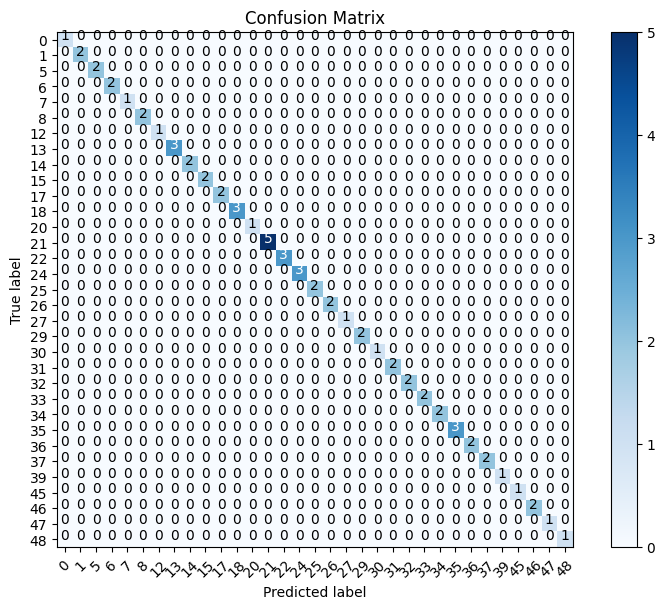

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


cm = confusion_matrix(y, pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()


classes = np.unique(np.concatenate((y, pred)))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [7]:

print(classification_report(pred, y))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         5
          22       1.00      1.00      1.00         3
          24       1.00      1.00      1.00         3
          25       1.00      1.00      1.00         2
          26       1.00    